In [1]:
import numpy as np

In [4]:
arr = np.array([('jin', 25, 67), ('suho', 18,77)], dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])
arr

array([('jin', 25, 67.), ('suho', 18, 77.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [5]:
arr[1]

('suho', 18, 77.)

In [7]:
arr['name']

array(['jin', 'suho'], dtype='<U10')

In [8]:
arr['weight']

array([67., 77.], dtype=float32)

In [10]:
# 각 튜플은 (필드이름, 데이터타입, 서브배열의 shape)
np.dtype([('a', 'f4'), ('b', np.float64), ('c', 'i4', (2, 2))])

dtype([('a', '<f4'), ('b', '<f8'), ('c', '<i4', (2, 2))])

In [11]:
# 콤마로 구분하는 dtype 문자열의 형태. 이 때 필드명은 기본 이름인 f0, f1 순으로 부여 (f#)
np.dtype('i8, f4, S3')

dtype([('f0', '<i8'), ('f1', '<f4'), ('f2', 'S3')])

In [12]:
# 필드 매개 변수 배열의 딕셔너리 형태
np.dtype({'names': ['col1', 'col2'], 'formats': ['i4', 'f4']})

dtype([('col1', '<i4'), ('col2', '<f4')])

In [13]:
# 구조화된 데이터 타입에서 필드 이름의 튜플을 구할 수 있다
c = np.dtype([('a', 'i8'), ('b', 'f4')])
c.names

('a', 'b')

In [14]:
c.fields

mappingproxy({'a': (dtype('int64'), 0), 'b': (dtype('float32'), 8)})

In [20]:
# 파이썬 고유 타입인 튜플로 할당
a = np.array([(1, 2, 3), (4, 5, 6)], dtype='i8, f4, f8')
a

array([(1, 2., 3.), (4, 5., 6.)],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '<f8')])

In [21]:
a[1] = (7, 8, 9)
a

array([(1, 2., 3.), (7, 8., 9.)],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '<f8')])

In [22]:
# 스칼라 값으로 할당
a = np.zeros(2, dtype='i8, f4, ?, S1')
a

array([(0, 0., False, b''), (0, 0., False, b'')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

In [23]:
a[:] = 7
a

array([(7, 7.,  True, b'7'), (7, 7.,  True, b'7')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

In [25]:
a[:] = np.arange(2)
a

array([(0, 0., False, b'0'), (1, 1.,  True, b'1')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

In [26]:
# 배열 인덱싱의 기본 구문은 i:j:k
# arr[i:j:k] i: 시작 인덱스, j: 끝 인덱스, k: 간격
# 시작하는 인덱스 i부터 k를 더하여 인덱스 j-1까지의 요소를 선택

In [27]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
arr[::2]

array([0, 2, 4, 6, 8])

In [29]:
arr[-1]

9

In [30]:
# 중요: 여기서 -1은 끝까지가 아니고, 끝에서 두번째를 의미
arr[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [32]:
# 배열의 끝에서 두번째부터 배열의 마지막 요소까지 선택
arr[-2:]

array([8, 9])

In [31]:
# 간격을 -1로 주면 전체 요소를 역순으로 선택
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [35]:
# 다차원 배열에서의 슬라이싱
arr2 = np.arange(9).reshape(3, 3)
arr2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [36]:
arr2[:, ::-1]

array([[2, 1, 0],
       [5, 4, 3],
       [8, 7, 6]])

In [37]:
arr2[:2, :2]

array([[0, 1],
       [3, 4]])

In [42]:
# 브로드캐스팅
arr = np.array([[0, 1, 2],
               [3, 4, 5],
               [6, 7, 8],
               [9, 10, 11]])
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [44]:
rows = np.array([[0, 0],
                [3, 3]], dtype=np.intp)
rows

array([[0, 0],
       [3, 3]])

In [45]:
columns = np.array([[0, 2],
                    [0, 2]], dtype=np.intp)
columns

array([[0, 2],
       [0, 2]])

In [46]:
# [[(0, 0), (0, 2)],
#  [(3, 0), (3, 2)]
arr[rows, columns]

array([[ 0,  2],
       [ 9, 11]])

In [47]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [48]:
# np.array([0, 2])가 행을 뜻하고 3이 열을 뜻해, (0, 3), (2, 3)의 값을 선택한다
arr[np.array([0, 2]), 3]

array([ 3, 13])

In [49]:
# (5,1)배열과 (3, 1)배열은 브로드캐스팅할 수 없다.
# 이때, newaxis를 사용해 차원을 증가시켜 shape을 동일하게 해서 브로드캐스팅한다.
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([11, 12, 13])
arr1 + arr2

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

In [50]:
arr1_nx = arr1[:, np.newaxis]
arr1_nx

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [51]:
arr2_nx = arr2[:, np.newaxis]
arr2_nx

array([[11],
       [12],
       [13]])

In [52]:
arr1_nx + arr2

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17],
       [16, 17, 18]])

In [53]:
arr2_nx + arr1

array([[12, 13, 14, 15, 16],
       [13, 14, 15, 16, 17],
       [14, 15, 16, 17, 18]])

In [54]:
# 불리언 배열로 인덱싱
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [55]:
ind = arr > 5
ind

array([[False, False, False, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True]])

In [56]:
arr[ind]

array([ 6,  7,  8,  9, 10, 11])

In [57]:
ind[: -1]

array([[False, False, False, False],
       [False, False,  True,  True]])

In [59]:
arr[ind[:, -1]]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
# 인덱스와 슬라이싱을 동시에
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [61]:
arr[np.array([1, 2]), 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [62]:
# 0이 아닌 요소를 행과 열을 나누어 인덱스를 반환
arr = np.array([[1, 0, 0], [0, 2, 0], [1, 1, 0]])
arr

array([[1, 0, 0],
       [0, 2, 0],
       [1, 1, 0]])

In [63]:
np.nonzero(arr)

(array([0, 1, 2, 2]), array([0, 1, 0, 1]))

In [64]:
# 전치행렬(transpose)를 사용해 행열 조합으로 인덱스를 나열할 수 있다
np.transpose(np.nonzero(arr))

array([[0, 0],
       [1, 1],
       [2, 0],
       [2, 1]])

In [67]:
# reduce() 메소드는 기본 축인 0축에 감소를 실행. axis=1로 설정하면 1축에 감소를 실행
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
np.add.reduce(arr)

array([5, 7, 9])

In [69]:
np.add.reduce(arr, axis=1)

array([ 6, 15])

In [70]:
# accumulate
np.add.accumulate([1, 2, 3, 4, 5])

array([ 1,  3,  6, 10, 15])

In [71]:
# multiply
np.multiply.accumulate([1, 2, 3, 4, 5])

array([  1,   2,   6,  24, 120])

In [73]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [74]:
np.add.accumulate(arr)

array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21]])

In [75]:
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

In [76]:
arr = np.arange(7)
arr

array([0, 1, 2, 3, 4, 5, 6])

In [77]:
# arr에서 [0:3], [3:5], [5:6], [6:]에 해당하는 요서를 각각 더한 값을 반환
# 즉, 0~2, 3~4, 5, 6 요소를 더한 값
np.add.reduceat(arr, [0, 3, 5, 6])

array([3, 7, 5, 6])

In [79]:
arr = np.linspace(0, 15, 16).reshape(4, 4)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [81]:
np.add.reduceat(arr, [0, 3, 1, 2, 0])

array([[12., 15., 18., 21.],
       [12., 13., 14., 15.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [24., 28., 32., 36.]])

In [82]:
np.multiply.outer([1, 2, 3], [4, 5, 6])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [83]:
arr1 = np.arange(6).reshape(2,3)
arr1

array([[0, 1, 2],
       [3, 4, 5]])

In [87]:
arr2 = np.arange(4)
arr2

array([0, 1, 2, 3])

In [89]:
arr = np.multiply.outer(arr1, arr2)
arr

array([[[ 0,  0,  0,  0],
        [ 0,  1,  2,  3],
        [ 0,  2,  4,  6]],

       [[ 0,  3,  6,  9],
        [ 0,  4,  8, 12],
        [ 0,  5, 10, 15]]])

In [90]:
arr.shape

(2, 3, 4)

In [91]:
arr1 = range(6)
arr1

range(0, 6)

In [92]:
np.power(arr1, 3)

array([  0,   1,   8,  27,  64, 125])

In [93]:
arr2 = [1, 2, 3, 3, 2, 1]
np.power(arr1, arr2)

array([ 0,  1,  8, 27, 16,  5])

In [94]:
arr3 = np.array([[1, 2, 3, 3, 2, 1], [1, 2, 3, 3, 2, 1]])
arr3

array([[1, 2, 3, 3, 2, 1],
       [1, 2, 3, 3, 2, 1]])

In [95]:
np.power(arr1, arr3)

array([[ 0,  1,  8, 27, 16,  5],
       [ 0,  1,  8, 27, 16,  5]])

In [96]:
np.sin(np.pi/2)

1.0

In [97]:
np.sin(np.deg2rad(90))

1.0

In [98]:
np.sin(np.array((0, 30, 45, 60, 90)) * np.pi/180)

array([0.        , 0.5       , 0.70710678, 0.8660254 , 1.        ])

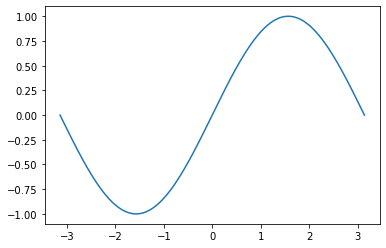

In [99]:
import matplotlib.pyplot as plt
arr = np.linspace(-np.pi, np.pi, 201)
plt.plot(arr, np.sin(arr))